In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Step 1 : Dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [11]:
# Reshape to include channel dimension

X_train_reshaped = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test_reshaped = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

print("Train shape:", X_train_reshaped.shape)
print("Test shape:", X_test_reshaped.shape)

Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [13]:
# Step 2 : Model

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Step 3 : Compile

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
# Step 4 : Train

history = model.fit(X_train_reshaped, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9607 - loss: 0.1276 - val_accuracy: 0.9847 - val_loss: 6.9659
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9873 - loss: 0.0418 - val_accuracy: 0.9868 - val_loss: 6.6573
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9903 - loss: 0.0297 - val_accuracy: 0.9862 - val_loss: 6.5507
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9935 - loss: 0.0205 - val_accuracy: 0.9838 - val_loss: 11.8427
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9948 - loss: 0.0159 - val_accuracy: 0.9883 - val_loss: 7.8550


In [19]:
# Step 5 : Evaluate

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("Test accuracy: ", test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9883 - loss: 7.8550
Test accuracy:  0.9883000254631042


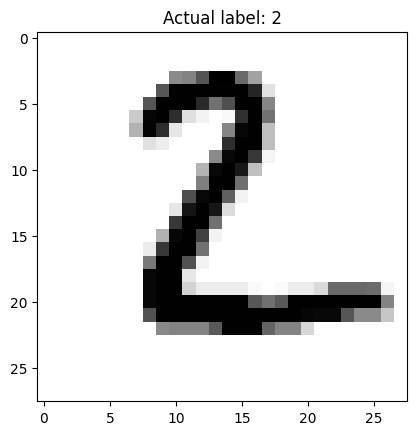

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted Label: 2


In [21]:
# Step 6 : Predict Example

import numpy as np
import matplotlib.pyplot as plt

plt.imshow(X_test[1], cmap='binary')
plt.title("Actual label: {}".format(y_test[1]))
plt.show()

prediction = model.predict(X_test)
print("Predicted Label:", np.argmax(prediction[1]))

In [23]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=[np.argmax(i) for i in prediction])

Text(95.72222222222221, 0.5, 'Actual')

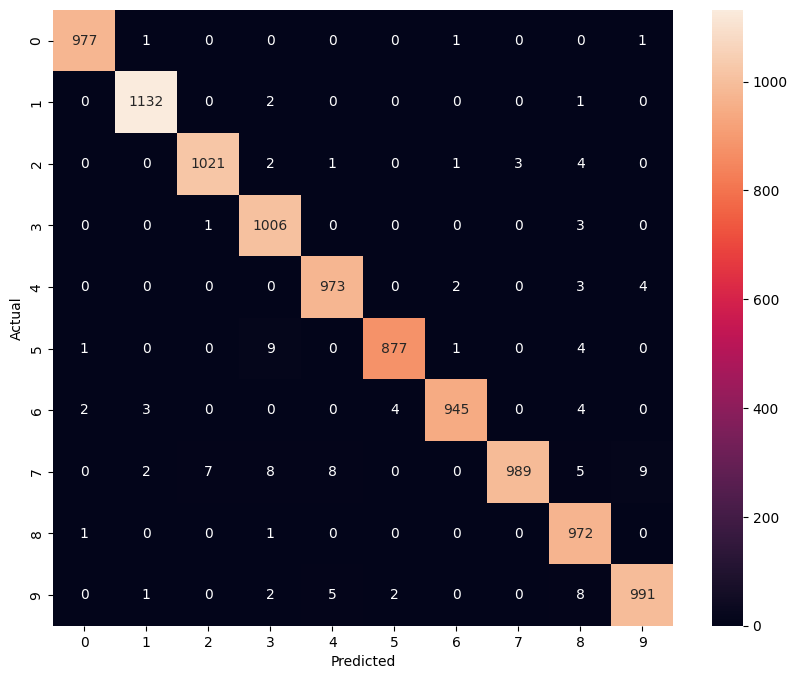

In [25]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")